<a href="https://colab.research.google.com/github/Adrian-create-gif/Orphan.Refined/blob/main/Orphan_refined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Read in the csv file
df=pd.read_csv('Orphan.csv')
#Remove first row of data
df.drop(0, inplace=True)
#Reset Index
df=df.reset_index(drop=True)
#View first 5 rows
df.head()
#Data cleaning
print("Before drop NA:",df.shape)
#Remove empty columns
df=df.dropna(axis=1).dropna()
print("After drop NA:",df.shape)
##Remove Id column,
id_columns=[x for x in df.columns if 'id' == x.lower()[-2:]]
df=df.drop(columns=id_columns)
print("Columns remaining after removing ID",df.columns)
#Remove Order column
order_columns=[x for x in df.columns if 'order' in x.lower()]
df.drop(columns=order_columns,inplace=True)
print("Columns remaining after removing order",df.columns)
#Remove columns with one value
non_columns=df.nunique()[df.nunique()==1].index
df.drop(columns=non_columns,inplace=True)
print("Columns remaining after removing repetitive columns",df.columns)
print("After cleaning:",df.shape)
focus_indicators=['Children living with neither parent, both alive',
       'Children living with neither parent, mother alive',
       'Children living with neither parent, father alive',
       'Children living with neither parent, both dead',
       'Children not living with a biological parent',
       'Households with double orphans',
       'Households with single orphans']
#Subset to focus on set indicators
focus_df=df[df['Indicator'].isin(focus_indicators)]
focus_df.sample()
focus_df["Value"]=focus_df["Value"].astype(float)
# Calculate the total value across all focused indicators
total_value_all_focused_indicators = focus_df['Value'].sum()

# Calculate the total value for each individual focused indicator
total_value_by_indicator = focus_df.groupby('Indicator')['Value'].sum()

# Calculate the percentage of each indicator's total value relative to the total value of all focused indicators
percentage_of_total_by_indicator = (total_value_by_indicator / total_value_all_focused_indicators) * 100

# Display the results
print("Total value across all focused indicators:", total_value_all_focused_indicators)
print("\nPercentage of total value by indicator:")
display(percentage_of_total_by_indicator.sort_values(ascending=False))
grouped_by_year_location = focus_df.groupby(['SurveyYear', 'Location'])
total_value_per_year_location = grouped_by_year_location['Value'].sum()
display(total_value_per_year_location)
focus_df['Percentage'] = grouped_by_year_location['Value'].transform(lambda x: (x / x.sum()) * 100)
display(focus_df.head())
results_df = focus_df[['SurveyYear', 'Location', 'Indicator', 'Percentage']]
display(results_df.head())
# Filter for a specific indicator and location'Children living with neither parent, both alive',
indicator_to_filter = 'Children not living with a biological parent'
location_to_filter = 'Western'

filtered_trends_df = results_df[(results_df['Indicator'] == indicator_to_filter) & (results_df['Location'] == location_to_filter)]

# Display the filtered data to observe trends over time
display(filtered_trends_df.sort_values(by='SurveyYear'))
# Example lists of indicators and locations to loop through
indicators_to_loop = ['Children not living with a biological parent']
locations_to_loop = ['Western','Central','Coast','North Eastern']

for indicator in indicators_to_loop:
    for location in locations_to_loop:
        print(f"Trends for '{indicator}' in '{location}':")
        filtered_trends_df = results_df[(results_df['Indicator'] == indicator) & (results_df['Location'] == location)]
        display(filtered_trends_df.sort_values(by='SurveyYear'))
        print("-" * 30) # Print a separator for clarity

Before drop NA: (1733, 30)
After drop NA: (1733, 24)
Columns remaining after removing ID Index(['ISO3', 'Location', 'Indicator', 'Value', 'Precision',
       'DHS_CountryCode', 'CountryName', 'SurveyYear', 'IndicatorOrder',
       'IndicatorType', 'CharacteristicOrder', 'CharacteristicCategory',
       'CharacteristicLabel', 'IsTotal', 'IsPreferred', 'SurveyYearLabel',
       'SurveyType'],
      dtype='object')
Columns remaining after removing order Index(['ISO3', 'Location', 'Indicator', 'Value', 'Precision',
       'DHS_CountryCode', 'CountryName', 'SurveyYear', 'IndicatorType',
       'CharacteristicCategory', 'CharacteristicLabel', 'IsTotal',
       'IsPreferred', 'SurveyYearLabel', 'SurveyType'],
      dtype='object')
Columns remaining after removing repetitive columns Index(['Location', 'Indicator', 'Value', 'Precision', 'SurveyYear',
       'IndicatorType', 'CharacteristicLabel', 'SurveyYearLabel',
       'SurveyType'],
      dtype='object')
After cleaning: (1733, 9)
Total valu

/tmp/ipython-input-1815640371.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_df["Value"]=focus_df["Value"].astype(float)


,Value
Indicator,
Children not living with a biological parent,38.473734
"Children living with neither parent, both alive",29.056125
Households with single orphans,20.093013
"Children living with neither parent, mother alive",4.086953
Households with double orphans,2.959518
"Children living with neither parent, both dead",2.737554
"Children living with neither parent, father alive",2.593102


SurveyYear  Location   
1993        Central        13.8
            Coast          19.0
            Eastern        15.4
            Nairobi        12.6
            Nyanza         23.8
                           ... 
2022        Uasin Gishu    31.4
            Vihiga         69.8
            Wajir          45.3
            West Pokot     39.3
            Western        61.3
Name: Value, Length: 84, dtype: float64

/tmp/ipython-input-1815640371.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_df['Percentage'] = grouped_by_year_location['Value'].transform(lambda x: (x / x.sum()) * 100)


,Location,Indicator,Value,Precision,SurveyYear,IndicatorType,CharacteristicLabel,SurveyYearLabel,SurveyType,Percentage
49,Coast,"Children living with neither parent, both alive",8.1,1,1993,I,Coast,1993,DHS,42.631579
50,Eastern,"Children living with neither parent, both alive",6.7,1,1993,I,Eastern,1993,DHS,43.506494
51,Central,"Children living with neither parent, both alive",5.7,1,1993,I,Central,1993,DHS,41.304348
52,Rift Valley,"Children living with neither parent, both alive",8.0,1,1993,I,Rift Valley,1993,DHS,42.328042
53,Western,"Children living with neither parent, both alive",11.6,1,1993,I,Western,1993,DHS,42.962963


,SurveyYear,Location,Indicator,Percentage
49,1993,Coast,"Children living with neither parent, both alive",42.631579
50,1993,Eastern,"Children living with neither parent, both alive",43.506494
51,1993,Central,"Children living with neither parent, both alive",41.304348
52,1993,Rift Valley,"Children living with neither parent, both alive",42.328042
53,1993,Western,"Children living with neither parent, both alive",42.962963


,SurveyYear,Location,Indicator,Percentage
95,1993,Western,Children not living with a biological parent,50.000000
214,1998,Western,Children not living with a biological parent,50.139276
347,2003,Western,Children not living with a biological parent,50.000000
548,2014,Western,Children not living with a biological parent,37.433155
1558,2022,Western,Children not living with a biological parent,39.804241


Trends for 'Children not living with a biological parent' in 'Western':


,SurveyYear,Location,Indicator,Percentage
95,1993,Western,Children not living with a biological parent,50.000000
214,1998,Western,Children not living with a biological parent,50.139276
347,2003,Western,Children not living with a biological parent,50.000000
548,2014,Western,Children not living with a biological parent,37.433155
1558,2022,Western,Children not living with a biological parent,39.804241


------------------------------
Trends for 'Children not living with a biological parent' in 'Central':


,SurveyYear,Location,Indicator,Percentage
93,1993,Central,Children not living with a biological parent,50.000000
212,1998,Central,Children not living with a biological parent,50.000000
345,2003,Central,Children not living with a biological parent,49.600000
546,2014,Central,Children not living with a biological parent,36.521739
1537,2022,Central,Children not living with a biological parent,37.142857


------------------------------
Trends for 'Children not living with a biological parent' in 'Coast':


,SurveyYear,Location,Indicator,Percentage
91,1993,Coast,Children not living with a biological parent,50.000000
210,1998,Coast,Children not living with a biological parent,50.000000
342,2003,Coast,Children not living with a biological parent,50.000000
543,2014,Coast,Children not living with a biological parent,37.012987
1517,2022,Coast,Children not living with a biological parent,38.709677


------------------------------
Trends for 'Children not living with a biological parent' in 'North Eastern':


,SurveyYear,Location,Indicator,Percentage
343,2003,North Eastern,Children not living with a biological parent,50.000000
544,2014,North Eastern,Children not living with a biological parent,33.994334
1524,2022,North Eastern,Children not living with a biological parent,30.890052


------------------------------


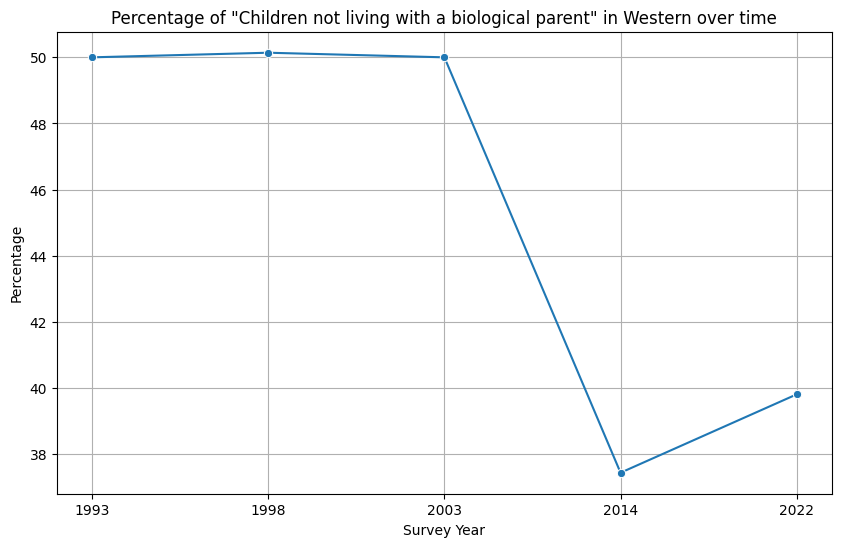

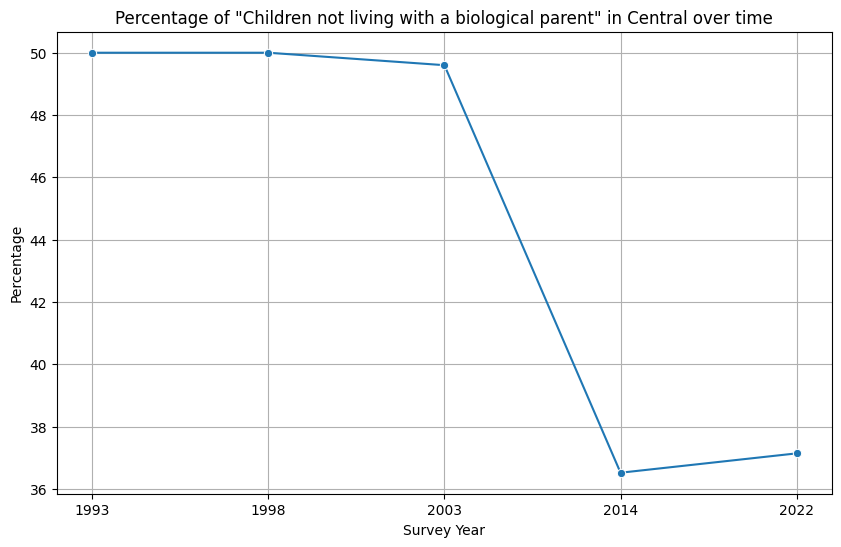

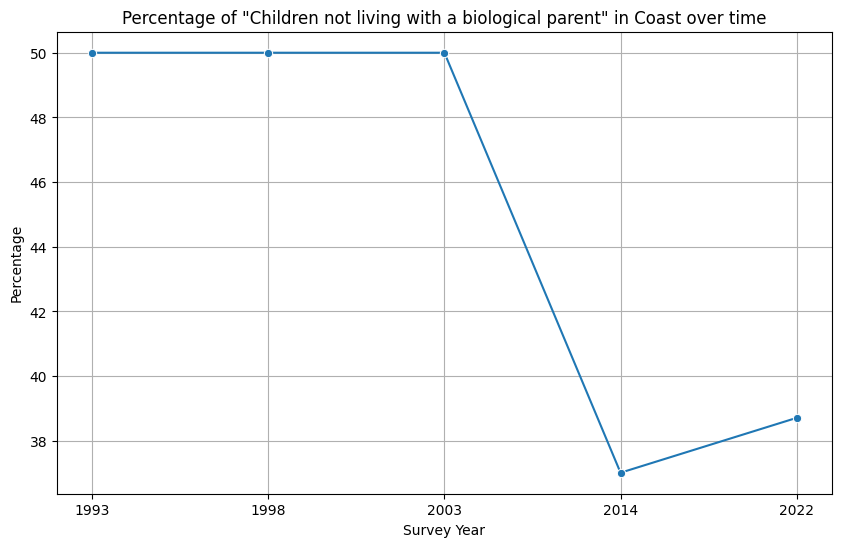

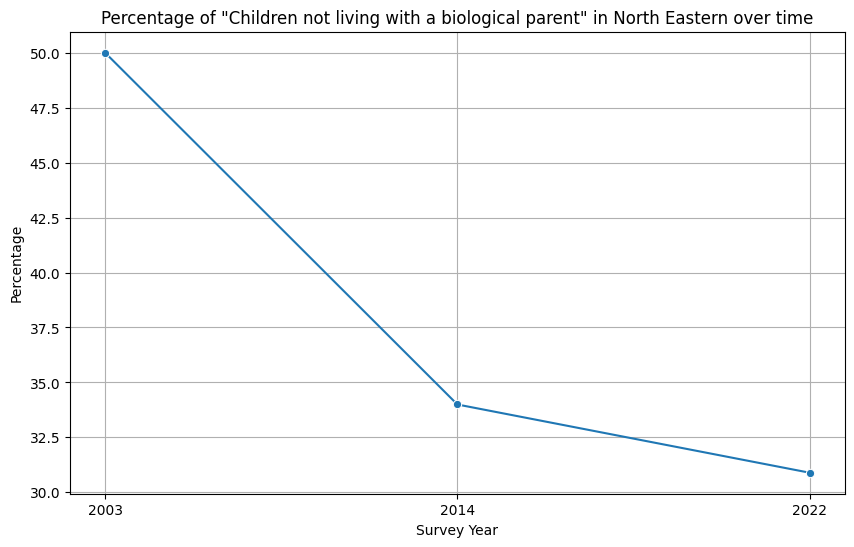

In [ ]:
# 1. Line plot of Percentage by SurveyYear for each Location
for location in locations_to_loop:
    filtered_trends_df = results_df[(results_df['Indicator'] == indicator_to_filter) & (results_df['Location'] == location)]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=filtered_trends_df, x='SurveyYear', y='Percentage', marker='o')
    plt.title(f'Percentage of "{indicator_to_filter}" in {location} over time')
    plt.xlabel('Survey Year')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.show()

/tmp/ipython-input-3749824891.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_year_df, x='Location', y='Percentage', palette='viridis')


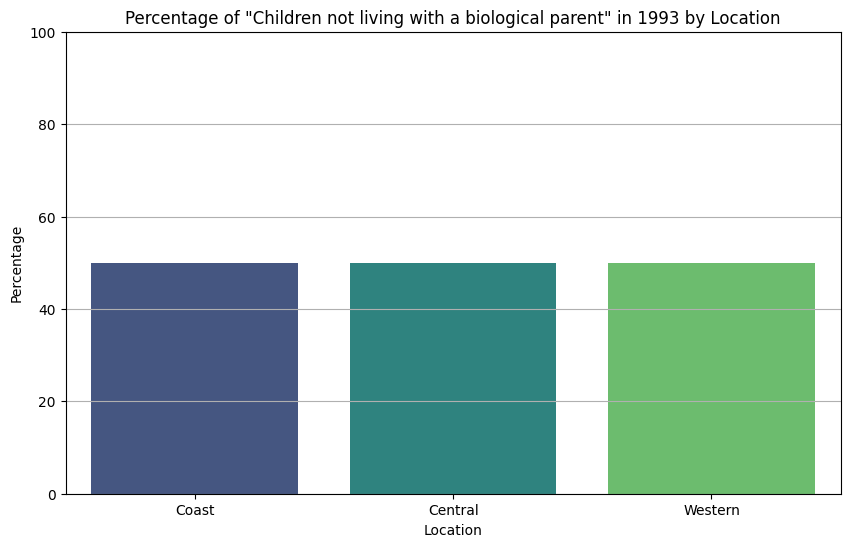

/tmp/ipython-input-3749824891.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_year_df, x='Location', y='Percentage', palette='viridis')


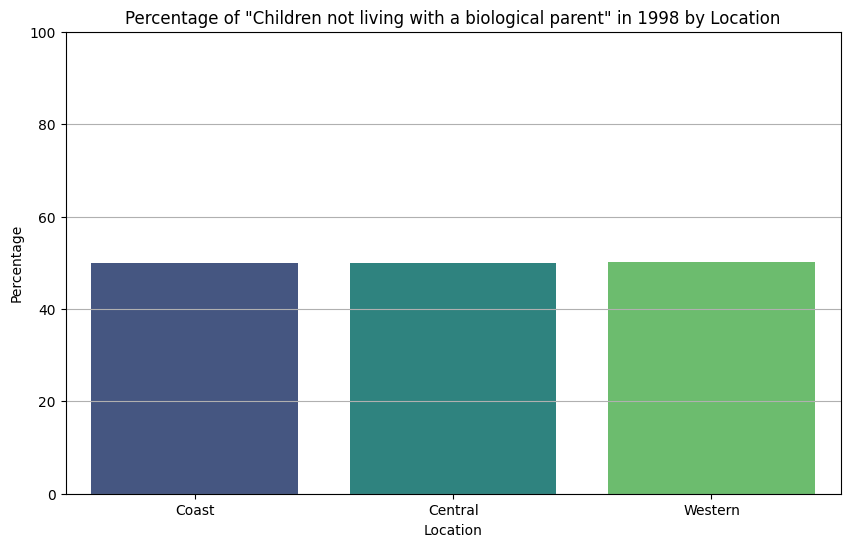

/tmp/ipython-input-3749824891.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_year_df, x='Location', y='Percentage', palette='viridis')


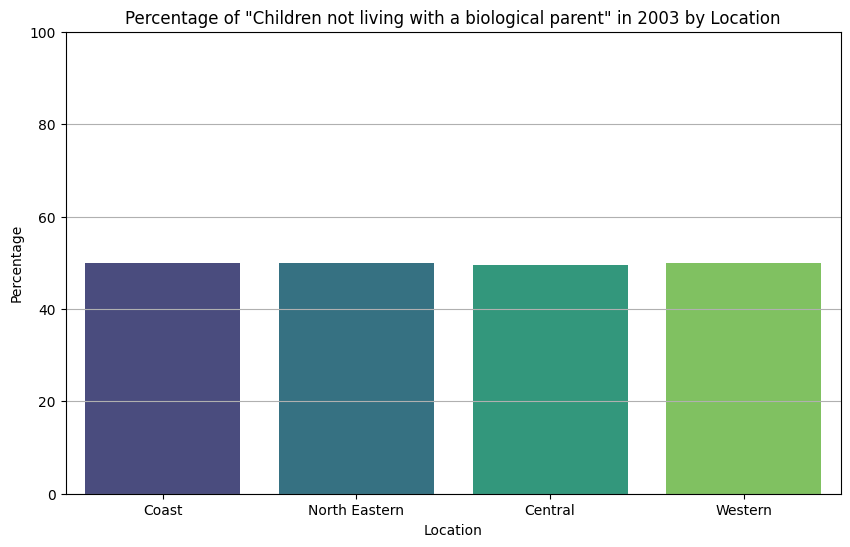

/tmp/ipython-input-3749824891.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_year_df, x='Location', y='Percentage', palette='viridis')


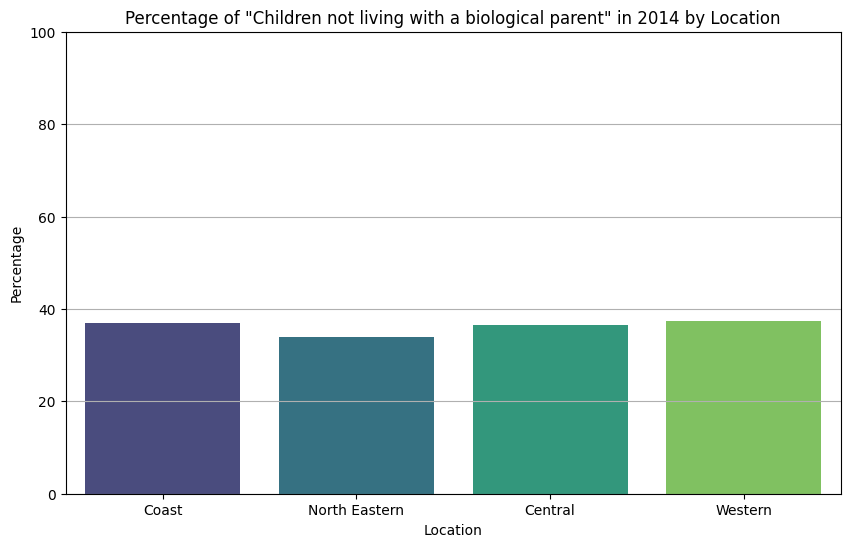

/tmp/ipython-input-3749824891.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_year_df, x='Location', y='Percentage', palette='viridis')


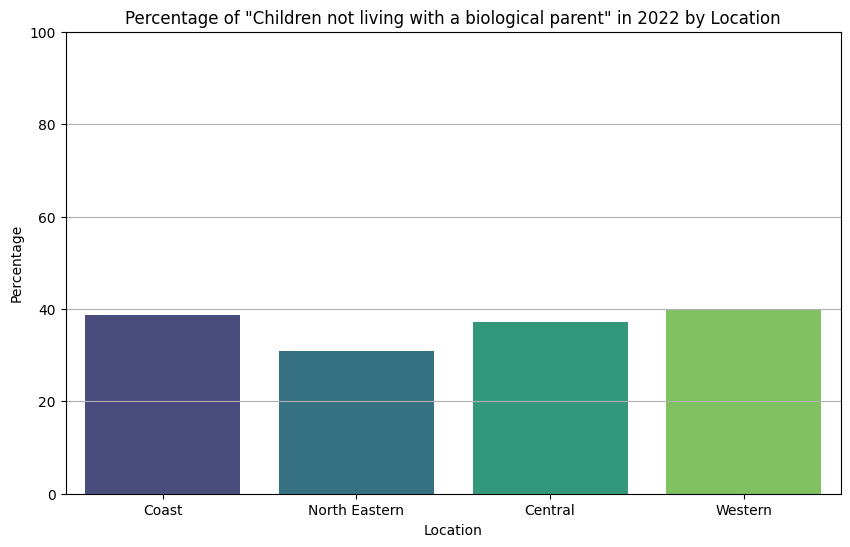

In [ ]:
# 2. Bar plot of Percentage by Location for each SurveyYear
# Get unique survey years from the filtered data
survey_years = results_df['SurveyYear'].unique()

for year in survey_years:
    # Filter data for the current year and selected locations/indicator
    filtered_year_df = results_df[(results_df['SurveyYear'] == year) &
                                  (results_df['Indicator'] == indicator_to_filter) &
                                  (results_df['Location'].isin(locations_to_loop))]

    if not filtered_year_df.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=filtered_year_df, x='Location', y='Percentage', palette='viridis')
        plt.title(f'Percentage of "{indicator_to_filter}" in {year} by Location')
        plt.xlabel('Location')
        plt.ylabel('Percentage')
        plt.ylim(0, 100) # Set y-limit to 0-100 for percentages
        plt.grid(axis='y')
        plt.show()
    else:
        print(f"No data for '{indicator_to_filter}' in the specified locations for the year {year}")

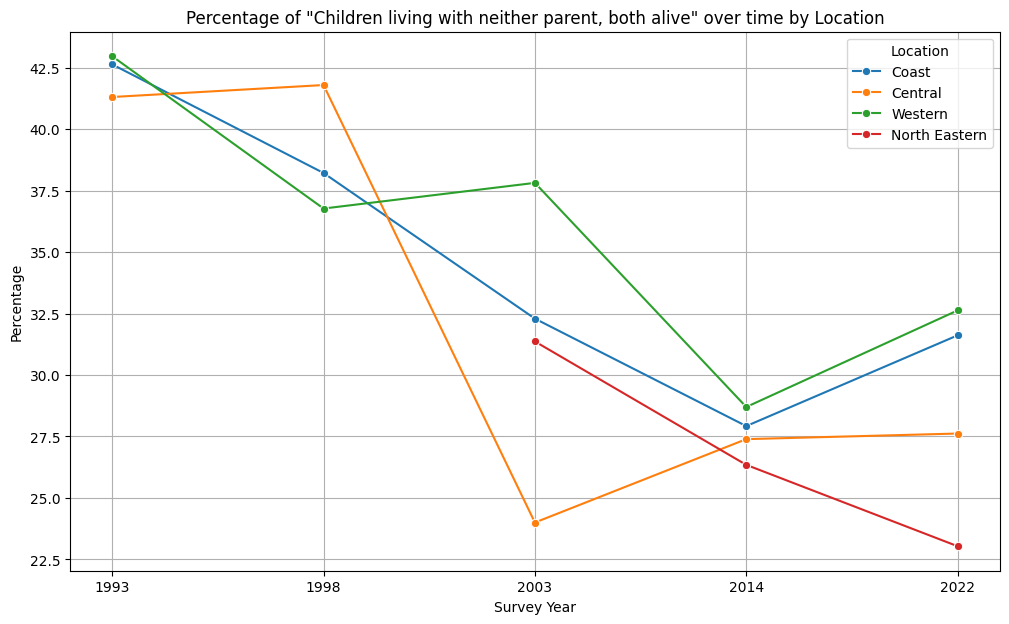

In [7]:
# 3. Combined Line Plot for all selected locations
indicator_to_filter = 'Children living with neither parent, both alive'
combined_trends_df = results_df[(results_df['Indicator'] == indicator_to_filter) &
                                (results_df['Location'].isin(locations_to_loop))]

plt.figure(figsize=(12, 7))
sns.lineplot(data=combined_trends_df, x='SurveyYear', y='Percentage', hue='Location', marker='o')
plt.title(f'Percentage of "{indicator_to_filter}" over time by Location')
plt.xlabel('Survey Year')
plt.ylabel('Percentage')
plt.grid(True)
plt.legend(title='Location')
plt.show()

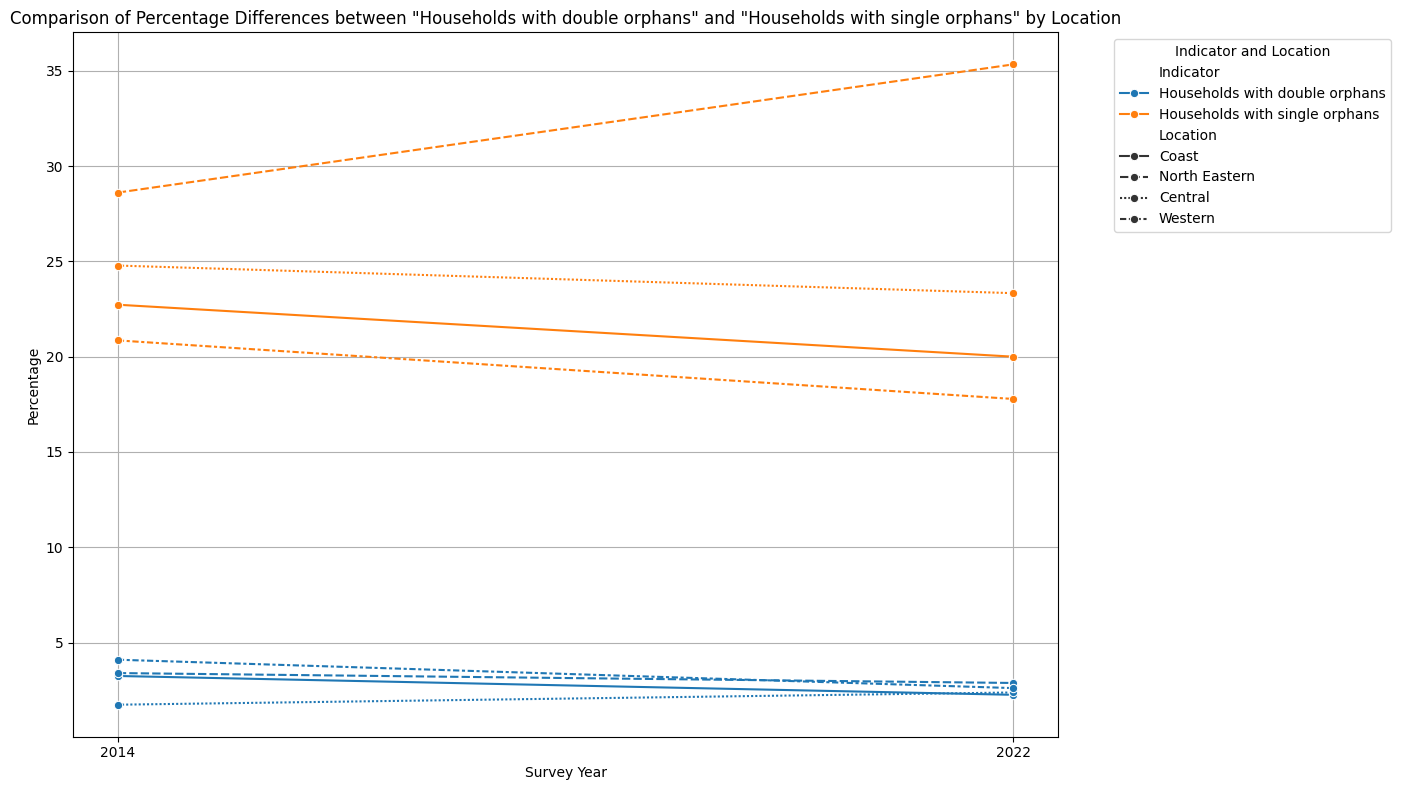

In [9]:
# Define the indicators to compare
indicators_to_compare = ['Households with double orphans', 'Households with single orphans']

# Filter the results_df for the specified indicators and locations
comparison_df = results_df[(results_df['Indicator'].isin(indicators_to_compare)) &
                           (results_df['Location'].isin(locations_to_loop))]

# Plot the comparison using a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=comparison_df, x='SurveyYear', y='Percentage', hue='Indicator', style='Location', marker='o')
plt.title('Comparison of Percentage Differences between "Households with double orphans" and "Households with single orphans" by Location')
plt.xlabel('Survey Year')
plt.ylabel('Percentage')
plt.grid(True)
plt.legend(title='Indicator and Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()